# Capstone Project - The Battle of the Neighborhoods (Week 2)
## Applied Data Science Capstone by IBM/Coursera

# Table of Content
0. INTRODUCTION
1. DATA DESCRIPTION
2. DATA PREPARATION
3. EXPLORE JOHANNESBURG
4. EXPLORE SANDTON
5. FOURSQUARE API
6. EXAMINE CLUSTERS
7. EXPLORE VENUE CATEGORIES
8. CONCLUSION

# 0. INTRODUCTION: Business Problem

Johannesburg is the largest city in South Africa, with a population of 957 441. Since Johannesburg is one of the wealthiest cities in Africa, most entrepreneurs and entertainers come to Johannesburg to seek opportunities, and because of its diversity, a lot of tourists like to explore the city. 

Sandton is a suburb located in Johannesburg and has a population of 222 415. Since Sandton is the most elite suburb in Johannesburg, most luxury hotels and restaurants are located there. Usually high profiled people seek accommodation in Sandton when they come to do business in Johannesburg. Sandton is a big suburb filled with different venues and business operations taking place. 

In this project we will explore 50 different venues in Sandton within a radius of 500 meters, so that entrepreneurs, entertainers and tourists who come to Sandton can get an idea of the shopping options they have and available venues they can explore.

# 1. DATA DESCRIPTION

**1.1. Johannesburg Data**

• Since Sandton is located in Johannesburg we are going to start by scraping The City of Johannesburg Wikipedia page to get the information about Sandton. 
• Wikipedia page: https://en.wikipedia.org/wiki/City_of_Johannesburg_Metropolitan_Municipality 

**1.2. Johannesburg Coordinates**

• Since the Johannesburg table on Wikipedia didn't have coordinates for the different suburbs, I created a csv file containing the coordinates of the different suburbs in Johannesburg using google maps. 

**1.3 Venues Data**

• I found the 50 different venues in Sandton by using the Foursquare API.

In [1]:
# pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm 
import matplotlib.colors as colors

from bs4 import BeautifulSoup # Beautiful Soup is a Python package for parsing HTML and XML documents
from geopy.geocoders import Nominatim # Convert an address into latitude and longitude values
from pandas.io.json import json_normalize # Transform JSON file into a pandas dataframe
import folium # Map rendering library 
import requests # Allows you to send HTTP/1.1 requests extremely easily

from sklearn.cluster import KMeans # Import k-means from clustering stage
import seaborn as sns
import matplotlib as plt

# 2. DATA PREPARATION

**We will first explore all the suburbs in Johannesburg and clean the data.**

## 2.1 Scraping Data Using Python's BeautifulSoup

In [3]:
website_url = requests.get("https://en.wikipedia.org/wiki/City_of_Johannesburg_Metropolitan_Municipality").text

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   City of Johannesburg Metropolitan Municipality - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"d16f3e27-76c8-4969-912f-3d9c873fc050","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"City_of_Johannesburg_Metropolitan_Municipality","wgTitle":"City of Johannesburg Metropolitan Municipality","wgCurRevisionId":962167554,"wgRevisionId":962167554,"wgArticleId":2244836,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with reference errors","Pages with duplicate r

### - Find the table we will be using

In [4]:
My_table = soup.find('table', {'class': 'wikitable sortable'})
My_table

<table class="wikitable sortable">
<tbody><tr>
<th>Place</th>
<th>Code</th>
<th>Population</th>
<th>Area (km<sup>2</sup>)</th>
<th>Most spoken languages
</th></tr>
<tr>
<td><a href="/wiki/Alexandra,_Gauteng" title="Alexandra, Gauteng">Alexandra</a></td>
<td><a class="external text" href="http://census2011.adrianfrith.com/place/798014" rel="nofollow">798014</a></td>
<td>179,624</td>
<td>6.91</td>
<td>Zulu 26%, Pedi 23%, Tsonga 11%, Xhosa 9%, Tswana 9%, Sotho 7%, Venda 4%
</td></tr>
<tr>
<td>Chartwell</td>
<td><a class="external text" href="http://census2011.adrianfrith.com/place/798011" rel="nofollow">798011</a></td>
<td>1,728</td>
<td>9.07</td>
<td>English 50%, Afrikaans 10%, Zulu 9%, <i>foreign languages 7%</i>, Ndebele 7%
</td></tr>
<tr>
<td>City of Johannesburg (non-urban)</td>
<td><a class="external text" href="http://census2011.adrianfrith.com/place/798002" rel="nofollow">798002</a></td>
<td>9,933</td>
<td>289.84</td>
<td>English 15%, Zulu 14%, Sotho 12%, Afrikaans 11%, Tswana 10%

### - Convert table to dataframe

In [5]:
table_rows = My_table.tbody.find_all("tr")

r = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text for tr in td]
    r.append(row)
        
# Creating Dataframe
df = pd.DataFrame(r, columns = ["Suburbs", "Code", "Population", "Area", "Most spoken languages"])
df.head()

,Suburbs,Code,Population,Area,Most spoken languages
0,None,None,None,None,None
1,Alexandra,798014,"179,624",6.91,"Zulu 26%, Pedi 23%, Tsonga 11%, Xhosa 9%, Tswa..."
2,Chartwell,798011,"1,728",9.07,"English 50%, Afrikaans 10%, Zulu 9%, foreign l..."
3,City of Johannesburg (non-urban),798002,"9,933",289.84,"English 15%, Zulu 14%, Sotho 12%, Afrikaans 11..."
4,Dainfern,798012,"6,601",4.08,"English 65%, foreign languages 15%, Afrikaans ..."


## 2.2 Cleaning Data

### - For the purpose of this project we will not need the "Most spoken languages" column.

In [6]:
df.drop(["Most spoken languages"], axis=1, inplace=True)
df.head()

,Suburbs,Code,Population,Area
0,None,None,None,None
1,Alexandra,798014,"179,624",6.91
2,Chartwell,798011,"1,728",9.07
3,City of Johannesburg (non-urban),798002,"9,933",289.84
4,Dainfern,798012,"6,601",4.08


In [7]:
df.shape

(41, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Suburbs     40 non-null     object
 1   Code        40 non-null     object
 2   Population  40 non-null     object
 3   Area        40 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [9]:
df.dtypes

Suburbs       object
Code          object
Population    object
Area          object
dtype: object

In [10]:
df.dropna(inplace=True)
df.head()

,Suburbs,Code,Population,Area
1,Alexandra,798014,"179,624",6.91
2,Chartwell,798011,"1,728",9.07
3,City of Johannesburg (non-urban),798002,"9,933",289.84
4,Dainfern,798012,"6,601",4.08
5,Diepsloot,798003,"138,329",12.00


### - Convert Numeric Columns to the correct dtype

In [11]:
df['Code'] = pd.to_numeric(df['Code'])

df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = pd.to_numeric(df['Population'])

df['Area'] = pd.to_numeric(df['Area'])

In [12]:
df.dtypes

Suburbs        object
Code            int64
Population      int64
Area          float64
dtype: object

In [13]:
df.head()

,Suburbs,Code,Population,Area
1,Alexandra,798014,179624,6.91
2,Chartwell,798011,1728,9.07
3,City of Johannesburg (non-urban),798002,9933,289.84
4,Dainfern,798012,6601,4.08
5,Diepsloot,798003,138329,12.00


### - Replace 0 with null

In [14]:
df.replace(0, np.nan, inplace=True)

In [15]:
df.isna().sum()

Suburbs       0
Code          0
Population    3
Area          0
dtype: int64

### - Drop "Population" rows with null values

In [16]:
df.dropna(inplace=True)

In [17]:
df["Population"].dtype

dtype('float64')

In [18]:
df["Population"] = df["Population"].astype(int)

In [19]:
df.Population.dtype

dtype('int32')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburbs     37 non-null     object 
 1   Code        37 non-null     int64  
 2   Population  37 non-null     int32  
 3   Area        37 non-null     float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 1.3+ KB


In [21]:
df.isna().sum()

Suburbs       0
Code          0
Population    0
Area          0
dtype: int64

In [22]:
df.shape

(37, 4)

### - Using Google Maps a csv file was created containing the latitude and longitude of each surburb in Joburg

In [23]:
df_joburg_csv = pd.read_csv("Johannesburg_Coordinates.csv")
df_joburg_csv.head()

,Suburb,Latitude,Longitude
0,Alexandra,-26.1033,28.0976
1,Chartwell,-25.9870,27.9715
2,City of Johannesburg (non-urban),-26.1704,27.9718
3,Dainfern,-25.9833,27.9981
4,Diepsloot,-25.9396,28.0128


### - Couple "df" and "df_joburg_csv" into one dataframe

In [24]:
df_joburg = pd.merge(df, df_joburg_csv, how="left", left_on="Suburbs", right_on="Suburb")
df_joburg.head()

,Suburbs,Code,Population,Area,Suburb,Latitude,Longitude
0,Alexandra,798014,179624,6.91,Alexandra,-26.1033,28.0976
1,Chartwell,798011,1728,9.07,Chartwell,-25.9870,27.9715
2,City of Johannesburg (non-urban),798002,9933,289.84,City of Johannesburg (non-urban),-26.1704,27.9718
3,Dainfern,798012,6601,4.08,Dainfern,-25.9833,27.9981
4,Diepsloot,798003,138329,12.00,Diepsloot,-25.9396,28.0128


### - Drop the duplicate suburbs column

In [25]:
df_joburg.drop("Suburb", axis=1, inplace=True)
df_joburg.head()

,Suburbs,Code,Population,Area,Latitude,Longitude
0,Alexandra,798014,179624,6.91,-26.1033,28.0976
1,Chartwell,798011,1728,9.07,-25.9870,27.9715
2,City of Johannesburg (non-urban),798002,9933,289.84,-26.1704,27.9718
3,Dainfern,798012,6601,4.08,-25.9833,27.9981
4,Diepsloot,798003,138329,12.00,-25.9396,28.0128


In [26]:
df_joburg.replace(0, np.nan, inplace=True)

In [27]:
df_joburg.isna().sum()

Suburbs       0
Code          0
Population    0
Area          0
Latitude      1
Longitude     1
dtype: int64

In [28]:
df_joburg.dropna(inplace=True)

In [29]:
df_joburg.isna().sum()

Suburbs       0
Code          0
Population    0
Area          0
Latitude      0
Longitude     0
dtype: int64

# 3. EXPLORE JOHANNESBURG

## 3.1 Get the latitude and longitude values for Johannesburg

In [30]:
joburg_address = "Johannesburg, South Africa"

geolocator = Nominatim(user_agent="joburg_explorer")
location  = geolocator.geocode(joburg_address, timeout=10)
latitude = location.latitude
longitude = location.longitude
print("The geographical coordinates of Johannesburg are {}, {}.".format(latitude, longitude))

The geographical coordinates of Johannesburg are -26.205, 28.049722.


## 3.2 Create a map of Joburg with Suburbs superimposed on top.

In [31]:
# create map of Joburg using latitude and longitude values
map_joburg = folium.Map(location=[latitude, longitude], zoom_start=10)
map_joburg

### - Add markers to the map

In [32]:
for lat, long, suburbs in zip(
        df_joburg["Latitude"],
        df_joburg["Longitude"],
        df_joburg["Suburbs"]):
    label = '{}'.format(suburbs)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        raduis=5,
        popup=label,
        color="blue",
        fill=True,
        fill_color="#3186cc",
        fill_opacity=0.7,
        parse_html=False).add_to(map_joburg)
map_joburg

# 4. EXPLORE SANDTON

## **Based on the Business Problem, We will be exploring the different venues in SANDTON**

## 4.1   Prepare the data

In [33]:
df_sandton = df_joburg[(df_joburg['Code'].isin(['798013']))]
df_sandton

,Suburbs,Code,Population,Area,Latitude,Longitude
31,Sandton,798013,222415,143.54,-26.1076,28.0567


## 4.2 Plot Sandton on the Joburg Map

In [34]:
joburg_address_ss = "Johannesburg, South Africa"

geolocator_ss = Nominatim(user_agent="joburg_ss_explorer")
location_ss  = geolocator_ss.geocode(joburg_address_ss, timeout=20)
latitude_ss = location_ss.latitude
longitude_ss = location_ss.longitude
print("The geographical coordinates of Johannesburg are {}, {}.".format(latitude_ss, longitude_ss))

The geographical coordinates of Johannesburg are -26.205, 28.049722.


In [35]:
# create map of Joburg using latitude and longitude values
map_joburg_ss = folium.Map(location=[latitude_ss, longitude_ss], zoom_start=10)
map_joburg_ss

### - Plotting Sandton on the Johannesburg Map

In [36]:
for lat, long, suburbs in zip(
        df_sandton["Latitude"],
        df_sandton["Longitude"],
        df_sandton["Suburbs"]):
    label = '{}'.format(suburbs)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        raduis=5,
        popup=label,
        color="blue",
        fill=True,
        fill_color="#3186cc",
        fill_opacity=0.7,
        parse_html=False).add_to(map_joburg_ss)
map_joburg_ss

# 5. FOURSQUARE API

## 5.1 Define Foursquare Credentials and Version

In [37]:
CLIENT_ID = "3F251IP0TQYDSBAVDOXEFF05YESVO4KU4UQTAT1IPWKAZL4D"
CLIENT_SECRET = "DVJKBLPMH4OWJACJIIXQIZT0N2DDNN5JT0EEHERPQLM1FX3M"
VERSION = "20180604"

## 5.2 Explore Sandton Venues
**We are going to explore 50 venues in Sandton within a radius of 500**

### - Get 50 venues in Sandton within a radius of 500 meters

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list = []
    
    
    LIMIT = 50
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION,
                lat,
                lng,
                radius,
                LIMIT)
        
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        venues_list.append([(
            name,
            lat,
            lng,
            v["venue"]["name"],
            v["venue"]["location"]["lat"],
            v["venue"]["location"]["lng"],
            v["venue"]["categories"][0]["name"]) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Suburb",
                    "Suburb Latitude",
                    "Suburb Longitude",
                    "Venue Name",
                    "Venue Latitude",
                    "Venue Longitude",
                    "Venue Category"]
        
    return(nearby_venues)

### - Run function above on sandton and create dataframe

In [39]:
sandton_venues = getNearbyVenues(names=df_sandton["Suburbs"],
                                latitudes=df_sandton["Latitude"],
                                longitudes=df_sandton["Longitude"])

In [40]:
sandton_venues.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,Sandton,-26.1076,28.0567,Nelson Mandela Square,-26.107411,28.054767,Plaza
1,Sandton,-26.1076,28.0567,The Michelangelo Hotel,-26.107369,28.054795,Hotel
2,Sandton,-26.1076,28.0567,Krispy Kreme Doughnuts,-26.107423,28.057398,Donut Shop
3,Sandton,-26.1076,28.0567,Trump's Grill,-26.107484,28.054812,BBQ Joint
4,Sandton,-26.1076,28.0567,cilantros,-26.107331,28.054742,Tapas Restaurant


In [41]:
sandton_venues.groupby("Suburb").count()

,Suburb Latitude,Suburb Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Sandton,50,50,50,50,50,50


In [42]:
print("There are {} unique venue categories.".format(len(sandton_venues["Venue Category"].unique())))

There are 31 unique venue categories.


## 5.3 Analyze Categories of Venues in Sandton

In [43]:
# one hot encoding
sandton_one = pd.get_dummies(sandton_venues[["Venue Category"]], prefix="", prefix_sep="")

sandton_one["Suburb"] = sandton_venues["Suburb"]

fixed_column = [sandton_one.columns[-1]] + list(sandton_one.columns[:-1])
sandton_one = sandton_one[fixed_column]

sandton_one.head()

,Suburb,African Restaurant,American Restaurant,BBQ Joint,Bakery,Bookstore,Café,Clothing Store,Cocktail Bar,Coffee Shop,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
0,Sandton,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Sandton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sandton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sandton,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sandton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
sandton_one.shape

(50, 32)

### - Use K-Means to Cluster the Sandton Venues

In [45]:
kclusters = 5

sandton_grouped_cluster = sandton_one.drop("Suburb", 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sandton_grouped_cluster)

sandton_df = kmeans.labels_
sandton_df

array([0, 2, 0, 0, 0, 3, 2, 3, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       3, 0, 0, 0, 1, 0, 2, 0, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0,
       2, 0, 4, 0, 0, 0])

### - Merge "sandton_one" and "df_sandton" dataframes

In [46]:
sandton_one.insert(0, "Cluster Labels", sandton_df)

sandton_merged = df_sandton

sandton_merged = sandton_merged.join(sandton_one.set_index("Suburb"), on="Suburbs")

sandton_merged.head()

,Suburbs,Code,Population,Area,Latitude,Longitude,Cluster Labels,African Restaurant,American Restaurant,BBQ Joint,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
31,Sandton,798013,222415,143.54,-26.1076,28.0567,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
31,Sandton,798013,222415,143.54,-26.1076,28.0567,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,Sandton,798013,222415,143.54,-26.1076,28.0567,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,Sandton,798013,222415,143.54,-26.1076,28.0567,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
31,Sandton,798013,222415,143.54,-26.1076,28.0567,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 6. EXAMINE CLUSTERS

## 6.1 Viewing Clusters

# - Cluster 5

In [47]:
cluster5 = sandton_merged.loc[sandton_merged["Cluster Labels"] == 4, sandton_merged.columns[[1] + list
                                                                                        (range(2, sandton_merged.shape[1]))]]
cluster5.head()

,Code,Population,Area,Latitude,Longitude,Cluster Labels,African Restaurant,American Restaurant,BBQ Joint,Bakery,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
31,798013,222415,143.54,-26.1076,28.0567,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 - ## Plot Cluster 5

In [48]:
df_cluster_5 = cluster5.drop(["Cluster Labels","Code", "Population", "Area", "Latitude", "Longitude"], axis=1)
df_cluster_5.T.head(7)

,31,31,31
African Restaurant,0,0,0
American Restaurant,0,0,0
BBQ Joint,0,0,0
Bakery,0,0,0
Bookstore,0,0,0
Café,0,0,0
Clothing Store,1,1,1


- Based on the **Dataframe**, **Cluster 5** only contains **Clothing Stores**. There are 3 of them out of 50 venues.

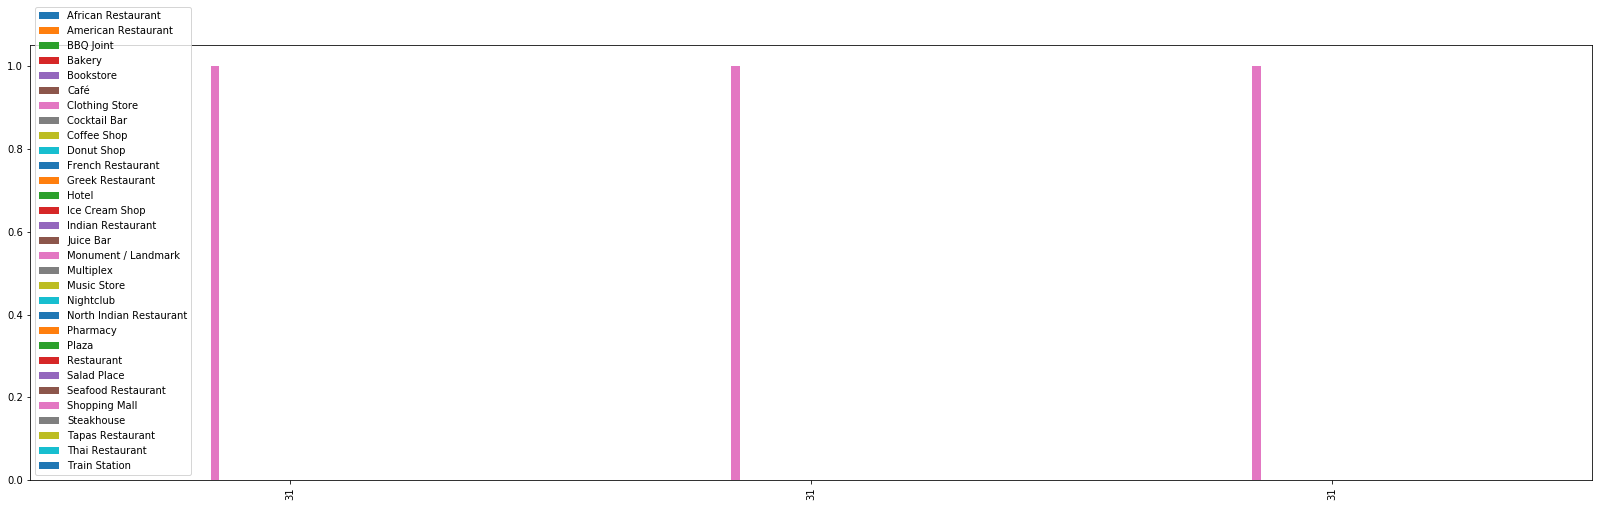

In [49]:
df_cluster_5.plot.bar(figsize=(28,8))

## - Evaluation: Cluster 5
* Based on the graph, **Cluster 5** contains only **Clothing Stores** that are in Sandton.
* Of the 50 Venues that are within a radius of 500 in Sandton, 3 of them are **Clothing Stores**.

# - Cluster 4

In [50]:
cluster4 = sandton_merged.loc[sandton_merged["Cluster Labels"] == 3, sandton_merged.columns[[1] + list
                                                                                        (range(2, sandton_merged.shape[1]))]]
cluster4.head()

,Code,Population,Area,Latitude,Longitude,Cluster Labels,African Restaurant,American Restaurant,BBQ Joint,Bakery,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
31,798013,222415,143.54,-26.1076,28.0567,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


- ## Plot Cluster 4

In [51]:
df_cluster_4 = cluster4.drop(["Cluster Labels","Code", "Population", "Area", "Latitude", "Longitude"], axis=1)
df_cluster_4.T.tail()

,31,31,31,31
Shopping Mall,0,0,0,0
Steakhouse,1,1,1,1
Tapas Restaurant,0,0,0,0
Thai Restaurant,0,0,0,0
Train Station,0,0,0,0


- Based on the **Dataframe**, **Cluster 4** only contains **Steak Houses**. There are 4 of them out of 50 venues.

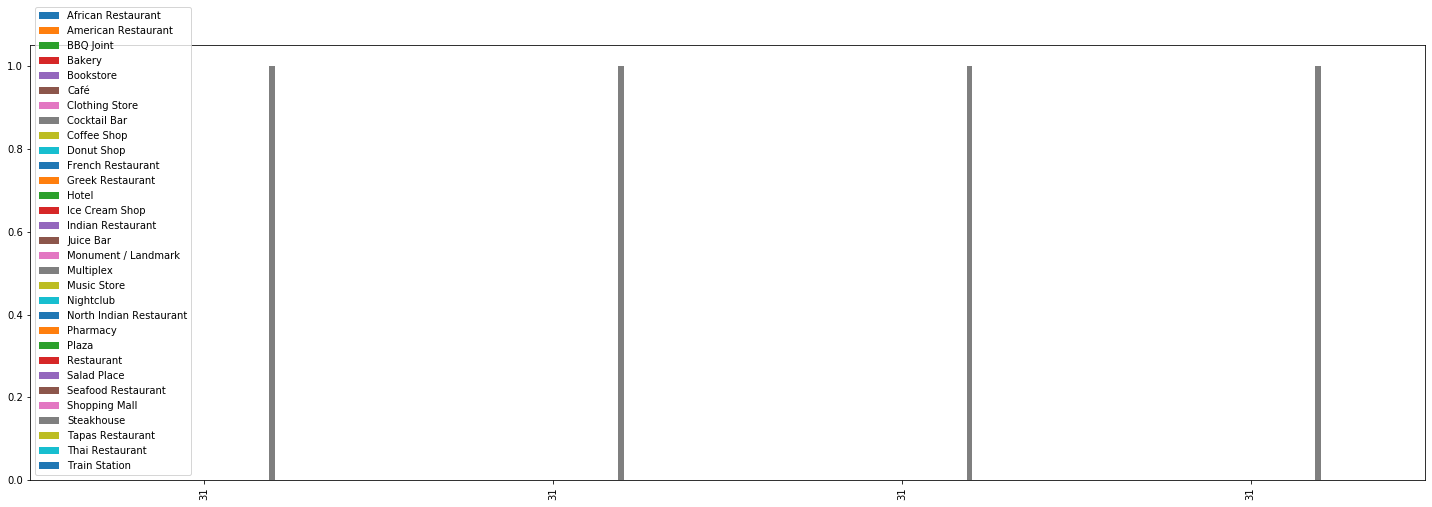

In [52]:
df_cluster_4.plot.bar(figsize=(25,8))

## - Evaluation: Cluster 4
* Based on the graph, **Cluster 4** contains only **Steak Houses** that are in Sandton.
* Of the 50 Venues that are within a radius of 500 in Sandton, 4 of them are **Steak Houses**.

# - Cluster 3

In [53]:
cluster3 = sandton_merged.loc[sandton_merged["Cluster Labels"] == 2, sandton_merged.columns[[1] + list
                                                                                        (range(2, sandton_merged.shape[1]))]]
cluster3.head()

,Code,Population,Area,Latitude,Longitude,Cluster Labels,African Restaurant,American Restaurant,BBQ Joint,Bakery,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
31,798013,222415,143.54,-26.1076,28.0567,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- ## Plot Cluster 3

In [54]:
df_cluster_3 = cluster3.drop(["Cluster Labels","Code", "Population", "Area", "Latitude", "Longitude"], axis=1)
df_cluster_3.T.head(15)

,31,31,31,31,31,31,31
African Restaurant,0,0,0,0,0,0,0
American Restaurant,0,0,0,0,0,0,0
BBQ Joint,0,0,0,0,0,0,0
Bakery,0,0,0,0,0,0,0
Bookstore,0,0,0,0,0,0,0
Café,0,0,0,0,0,0,0
Clothing Store,0,0,0,0,0,0,0
Cocktail Bar,0,0,0,0,0,0,0
Coffee Shop,0,0,0,0,0,0,0
Donut Shop,0,0,0,0,0,0,0


- Based on the **Dataframe**, **Cluster 3** only contains **Hotels**. There are 7 of them out of the 50 venues.

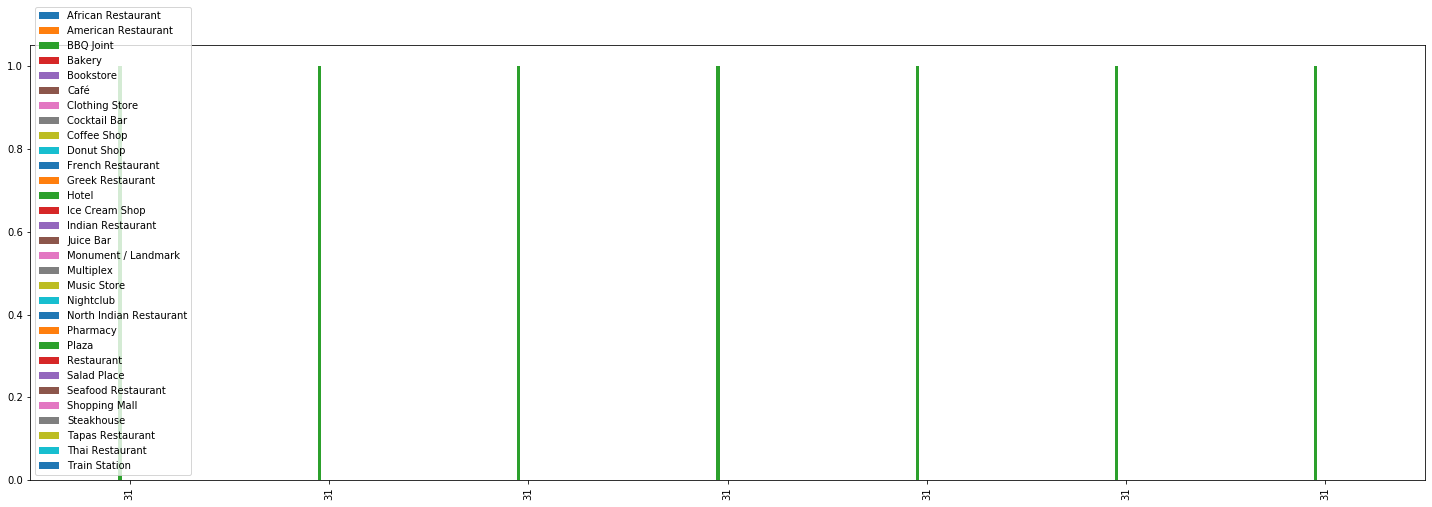

In [55]:
df_cluster_3.plot.bar(figsize=(25,8))

## - Evaluation: Cluster 3
* Based on the graph, **Cluster 3** contains only **Hotels** that are in Sandton.
* Of the 50 Venues that are within a radius of 500 in Sandton, 7 of them are **Hotels**.

# - Cluster 2

In [56]:
cluster2 = sandton_merged.loc[sandton_merged["Cluster Labels"] == 1, sandton_merged.columns[[1] + list
                                                                                        (range(2, sandton_merged.shape[1]))]]
cluster2.head()

,Code,Population,Area,Latitude,Longitude,Cluster Labels,African Restaurant,American Restaurant,BBQ Joint,Bakery,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
31,798013,222415,143.54,-26.1076,28.0567,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- ## Plot Cluster 2

In [57]:
df_cluster_2 = cluster2.drop(["Cluster Labels","Code", "Population", "Area", "Latitude", "Longitude"], axis=1)
df_cluster_2.T.head(10)

,31,31,31
African Restaurant,0,0,0
American Restaurant,0,0,0
BBQ Joint,0,0,0
Bakery,0,0,0
Bookstore,0,0,0
Café,0,0,0
Clothing Store,0,0,0
Cocktail Bar,0,0,0
Coffee Shop,1,1,1
Donut Shop,0,0,0


- Based on the **Dataframe**, **Cluster 2** only contains **Coffee Shops**. There are 3 of them out of the 50 venues.

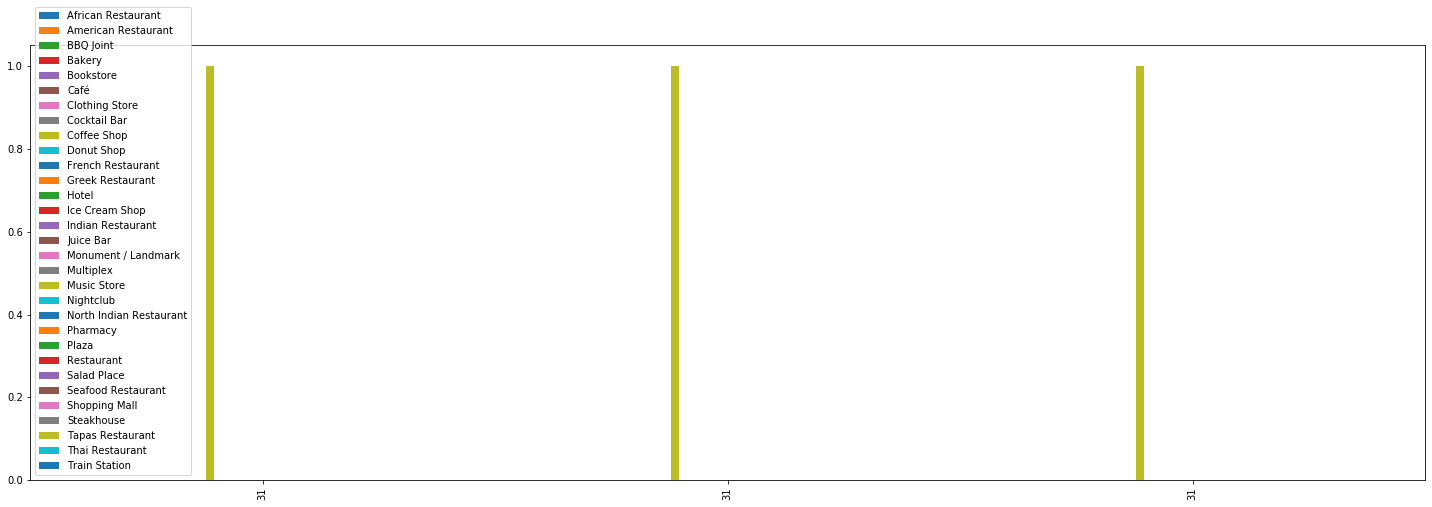

In [58]:
df_cluster_2.plot.bar(figsize=(25,8))

## - Evaluation: Cluster 2
* Based on the graph, **Cluster 2** contains only **Coffee Shops** that are in Sandton.
* Of the 50 Venues that are within a radius of 500 in Sandton, 3 of them are **Coffee Shops**.

# - Cluster 1

In [59]:
cluster1 = sandton_merged.loc[sandton_merged["Cluster Labels"] == 0, sandton_merged.columns[[1] + list
                                                                                        (range(2, sandton_merged.shape[1]))]]
cluster1.head()

,Code,Population,Area,Latitude,Longitude,Cluster Labels,African Restaurant,American Restaurant,BBQ Joint,Bakery,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
31,798013,222415,143.54,-26.1076,28.0567,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31,798013,222415,143.54,-26.1076,28.0567,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31,798013,222415,143.54,-26.1076,28.0567,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- ## Plot Cluster 1

In [60]:
df_cluster_1 = cluster1.drop(["Cluster Labels","Code", "Population", "Area", "Latitude", "Longitude"], axis=1)
df_cluster_1.head()

,African Restaurant,American Restaurant,BBQ Joint,Bakery,Bookstore,Café,Clothing Store,Cocktail Bar,Coffee Shop,Donut Shop,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
31,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
31,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Based on the **Dataframe**, **Cluster 1** has all the other venues that were not included in Cluster 5,4,3,2. 

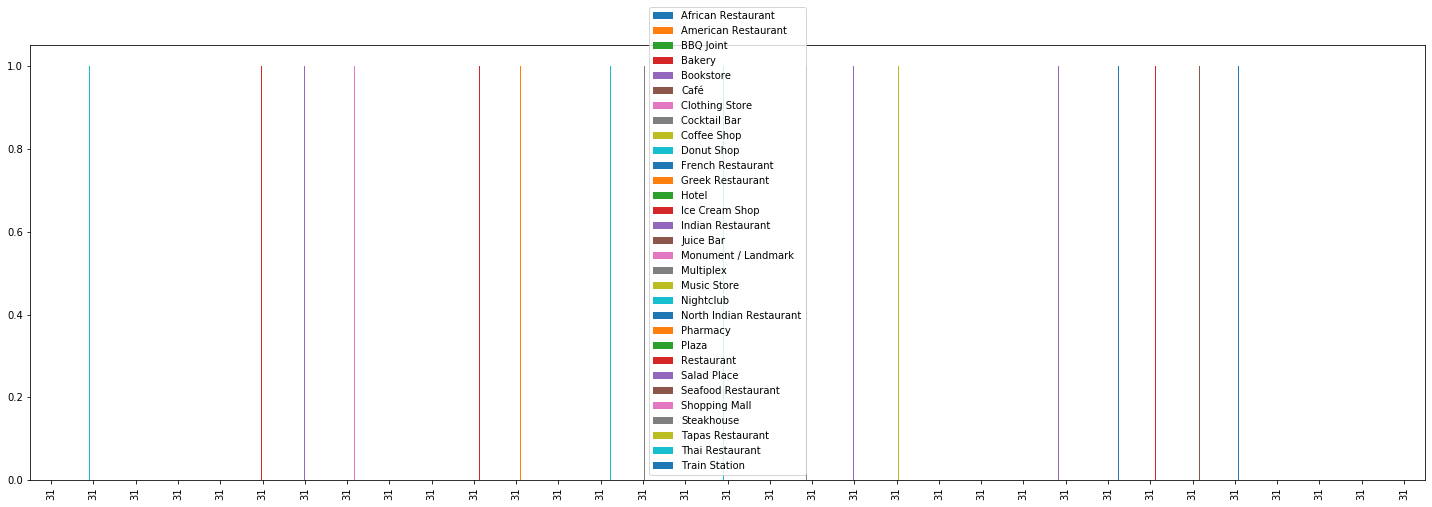

In [61]:
df_cluster_1.plot.bar(figsize=(25,8))

## - Evaluation: Cluster 1
* Based on the graph, **Cluster 1** contains all the other venue categories in Sandton that are less than 3.
* Within a radius of 500 in Sandton.

# 7. EXPLORE VENUE CATEGORIES

## 7.1 Take the mean of the frequency of occurrence of each category

In [62]:
sandton_mean = sandton_one.mean()
sandton_mean.head()

Cluster Labels         0.82
African Restaurant     0.02
American Restaurant    0.04
BBQ Joint              0.02
Bakery                 0.02
dtype: float64

## 7.2 Check the 5 most common venues in Sandton

In [63]:
sandton_grouped = sandton_one.groupby("Suburb").mean().reset_index()
sandton_grouped

,Suburb,Cluster Labels,African Restaurant,American Restaurant,BBQ Joint,Bakery,Bookstore,Café,Clothing Store,Cocktail Bar,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
0,Sandton,0.82,0.02,0.04,0.02,0.02,0.04,0.02,0.06,0.02,...,0.02,0.02,0.04,0.02,0.02,0.04,0.08,0.02,0.02,0.02


In [64]:
sandton_grouped.drop(["Cluster Labels"], inplace=True, axis=1)
sandton_grouped

,Suburb,African Restaurant,American Restaurant,BBQ Joint,Bakery,Bookstore,Café,Clothing Store,Cocktail Bar,Coffee Shop,...,Pharmacy,Plaza,Restaurant,Salad Place,Seafood Restaurant,Shopping Mall,Steakhouse,Tapas Restaurant,Thai Restaurant,Train Station
0,Sandton,0.02,0.04,0.02,0.02,0.04,0.02,0.06,0.02,0.06,...,0.02,0.02,0.04,0.02,0.02,0.04,0.08,0.02,0.02,0.02


In [65]:
def return_most_common_venue(row, num_top_venue):
    row_cat = row.iloc[1:]
    row_cat_sorted = row_cat.sort_values(ascending=False)
    return row_cat_sorted.index.values[0: num_top_venue]

num_top_venue = 5

indicators = ["st", "nd", "rd"]

columns = ["Suburb"]
for ind in np.arange(num_top_venue):
    try:
        columns.append("{}{} Most Common Venue".format(ind+1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind+1))
        
sandton_sorted = pd.DataFrame(columns=columns)
sandton_sorted["Suburb"] = sandton_grouped["Suburb"]

for ind in np.arange(sandton_grouped.shape[0]):
    sandton_sorted.iloc[ind, 1:] = return_most_common_venue(sandton_grouped.iloc[ind, :], num_top_venue)

sandton_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Sandton,Hotel,Steakhouse,Coffee Shop,Clothing Store,Bookstore


- ### Evaluation:
The most common **Venue Category** in Sandton is Hotels.

# 8. CONCLUSION

## 8.1 Results

- The Foursquare API returned 50 venues in Sandton, within a radius of 500 meters. The 50 venues had 31 unique categories, 
which are:
   
| Category Venue | Category Venue | Category Venue | Category Venue | Category Venue |
| --- | --- | --- | --- | --- |
| African Restaurant | Cocktail Bar | Indian Restaurant | Pharmacy | Tapas Restaurant |
| American Restaurant | Coffee Shop | Juice Bar | Plaza | Thai Restaurant |
| BBQ Joint | Donut Shop | Monument/Landmark | Restaurant | Train Station | 
| Bakery | French Restaurant | Multiplex | Salad Place | Null |
| Bookstore | Greek Restaurant | Music Store | Seafood Restaurant | Null |
| Cafe | Hotel | Nightclub | Shopping Mall | Null |
| Clothing Store | Ice Cream Shop | North Indian Restauran | Steakhouse | Null |

- I used K-Means to cluster the venue categories. The venue categories were placed in 5 clusters.The 5th cluster contained 3 
Clothing stores. The 4th cluster contained 4 Steak houses. The 3rd cluster contained 7 hotels. The 2nd cluster contained 3 
Coffee Shops. And the 1st cluster contained the other venue categories that are less than 3.

- The top 5 most common venues were found. The first most common venue category was hotels, The second most common venue
category was Steakhouse, The third most common venue was Coffee Shop, The fourth most common venue category was Clothing Store,
The fifth most common venue was Bookstore.

## 8.2 Discussion

In conclusion, entreprenuers, entertainers and tourists that come to Sandton can expect to find a large number of hotels to 
choose accomodation from. There are also a variety of steak houses and Coffee Shops. Clothing stores and Bookstores are also
available to explore.